In [1]:
import qualified Graphics.Vega.VegaLite as V
import qualified Data.Text as T
import qualified Data.Text.Lazy as LT
import Data.Aeson.Text (encodeToLazyText)
import Data.String (fromString)

import qualified IHaskell.Display as D

let plot = V.toVegaLite [ bkg, cars, V.mark V.Circle [], enc [] ]
    cars =  V.dataFromUrl (fromString "https://vega.github.io/vega-datasets/data/cars.json") []

    enc = V.encoding
            . V.position V.X [ V.PName (fromString "Horsepower"), V.PmType V.Quantitative ]
            . V.position V.Y [ V.PName (fromString "Miles_per_Gallon"), V.PmType V.Quantitative ]
            . V.color [ V.MName (fromString "Origin"), V.MmType V.Nominal ]

    bkg = V.background (fromString "rgba(0, 0, 0, 0.05)")
  
V.fromVL plot

{
    "mark": "circle",
    "data": {
        "url": "https://vega.github.io/vega-datasets/data/cars.json"
    },
    "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
    "encoding": {
        "color": {
            "field": "Origin",
            "type": "nominal"
        },
        "x": {
            "field": "Horsepower",
            "type": "quantitative"
        },
        "y": {
            "field": "Miles_per_Gallon",
            "type": "quantitative"
        }
    },
    "background": "rgba(0, 0, 0, 0.05)"
}

In [2]:
let json_string = LT.unpack (encodeToLazyText (V.fromVL plot))
D.Display [D.json json_string]

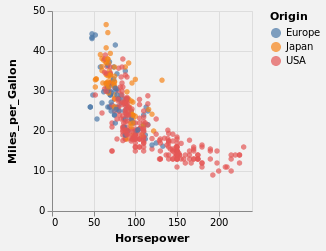

In [3]:
D.Display [D.vegalite json_string]

In [4]:
let markdown = "## headline ##\nthis is an attempt to write markdown"
D.Display [D.markdown markdown]

## headline ##
this is an attempt to write markdown